# Q5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

We condense all the constants to get:
$$F_d=kv^2 \hat{v}$$

here , $k=\frac{\pi r^2 \rho C}{2}$

Now, we have:
 $$\ddot{x}=F_x/m = \frac{-kv^2}{m} \frac{\dot{x}}{\sqrt{\dot{x}^2 +\dot{y}^2}}= -\frac{k \dot{x}}{m} \sqrt{\dot{x}^2 + \dot{y}^2}$$
 
 $$\ddot{y} = \frac{F_y}{m}= -\frac{mg + kv^2 \frac{\dot{y}}{\sqrt{\dot{x}^2 +\dot{y}^2}}}{m} = -g - \frac{k \dot{y}}{m} \sqrt{\dot{x}^2 + \dot{y}^2}$$
 
 
 We define: $x_1 =\dot{x}, y_1=\dot{y}$, which makes the equations:
 $$\dot{x_1}=-\frac{k x_1}{m} \sqrt{x_1^2 + y_1^2}$$
 $$\ddot{y} = -g - \frac{k y_1}{m} \sqrt{x_1^2 + y_1^2}$$
 

In [27]:
#defining the functions
pi=math.pi
R=8e-2
rho=1.22e3
C=0.47
m=1e3
g=9.81

k=0.5*pi*R**2*rho*C


def funcx(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    return x1

def funcy(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    return y1

def funcx1(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    return (-k*x1/m)*math.sqrt(x1**2 + y1**2)

def funcy1(vec, t):
    x=vec[0]
    y=vec[1]
    x1=vec[2]
    y1=vec[3]
    return -g -(k*y1/m)*math.sqrt(x1**2 + y1**2)

def func(vec,t):
    return np.array([funcx(vec,t), funcy(vec, t), funcx1(vec,t), funcy1(vec, t)])

In [28]:
def RK_4(x, t, func, h):
    f=func(x,t)
    k1=h*f
    k2=h*func(x+k1/2, t+h/2)
    k3=h*func(x+k2/2, t+h/2)
    k4=h*func(x+k3, t+h)
    x= x + (k1+2*k2+2*k3+k4)/6
    t= t + h
    return [x,t]

In [29]:
h=0.01
v=100
theta=30

x=0
y=0
x1=v*np.cos((theta*pi)/180)
y1=v*np.sin((theta*pi)/180)


X=[0]
Y=[0]
X1=[x1]
Y1=[y1]
time=[0]
t=0

vec=np.array([x,y,x1,y1])

while(t<=30 and vec[1]>=0):
    vec=RK_4(vec, t, func, h)[0]
    t=RK_4(vec, t, func, h)[1]
    X.append(vec[0])
    Y.append(vec[1])
    X1.append(vec[2])
    Y1.append(vec[3])
    time.append(t)

Text(0.5, 1.0, 'trajectory(m)')

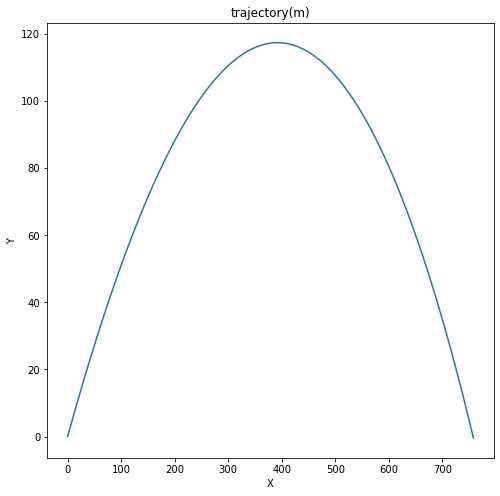

In [40]:
plt.figure(figsize=(8,8))
plt.plot(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('trajectory(m)')

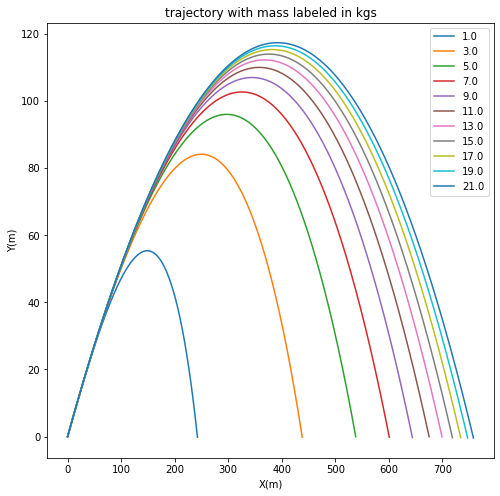

In [41]:
plt.figure(figsize=(8,8))
for i in range(1000, 21001, 2000):
    m=i
    x=0
    y=0
    x1=v*np.cos((theta*pi)/180)
    y1=v*np.sin((theta*pi)/180)
    X=[0]
    Y=[0]
    t=0
    vec=np.array([x,y,x1,y1])
    while(t<=30 and vec[1]>=0):
        vec=RK_4(vec, t, func, h)[0]
        t=RK_4(vec, t, func, h)[1]
        X.append(vec[0])
        Y.append(vec[1])
    plt.plot(X,Y , label=m/1000)
    
plt.xlabel("X(m)")
plt.ylabel("Y(m)")
plt.title('trajectory with mass labeled in kgs')
plt.legend()
    